# PRAKTIKUM 2

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import tensorflow as tf

# Load dataset
iris = load_iris()
X = iris.data
y = iris.target.reshape(-1, 1)

# One-hot encoding
encoder = OneHotEncoder(sparse_output=False)
y = encoder.fit_transform(y)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Bangun model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu', input_shape=(4,)),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

# Kompilasi
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Latih model
model.fit(X_train, y_train, epochs=50, batch_size=8)

# Evaluasi
loss, acc = model.evaluate(X_test, y_test)
print(f"Akurasi: {acc}")

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.3057 - loss: 1.3473
Epoch 2/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.2898 - loss: 1.2446
Epoch 3/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3947 - loss: 1.1075
Epoch 4/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6655 - loss: 0.9781
Epoch 5/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6130 - loss: 0.9456 
Epoch 6/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6363 - loss: 0.8823
Epoch 7/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6579 - loss: 0.8674
Epoch 8/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7138 - loss: 0.8175
Epoch 9/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6549 - loss: 0.8136
Epoch 10/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6948 - loss: 0.7724
Epoch 11/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7564 - loss: 0.7490
Epoch 12/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.695

# TUGAS 2

In [ ]:
# Ubah jumlah neuron hidden layer
# Bandingkan akurasi dengan konfigurasi awal
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import tensorflow as tf
import numpy as np

# Load dataset
iris = load_iris()
X = iris.data
y = iris.target.reshape(-1, 1)

# One-hot encoding
encoder = OneHotEncoder(sparse_output=False)
y = encoder.fit_transform(y)

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Fungsi untuk membangun dan melatih model
def run_model(n1, n2):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(n1, activation='relu', input_shape=(4,)),
        tf.keras.layers.Dense(n2, activation='relu'),
        tf.keras.layers.Dense(3, activation='softmax')
    ])

    model.compile(
        optimizer='adam',
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    model.fit(X_train, y_train, epochs=50, batch_size=8, verbose=0)

    loss, acc = model.evaluate(X_test, y_test, verbose=0)
    return acc

# Konfigurasi yang mau dibandingkan
configs = [
    (10, 8),   # konfigurasi awal
    (16, 8),
    (32, 16),
    (8, 4),
    (4, 4)
]

print("=== HASIL PERBANDINGAN AKURASI ===")
for n1, n2 in configs:
    acc = run_model(n1, n2)
    print(f"Hidden=({n1}, {n2}) -> Akurasi = {acc:.4f}")

=== HASIL PERBANDINGAN AKURASI ===


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Hidden=(10, 8) -> Akurasi = 0.9667
Hidden=(16, 8) -> Akurasi = 1.0000
Hidden=(32, 16) -> Akurasi = 0.9667
Hidden=(8, 4) -> Akurasi = 0.3333
Hidden=(4, 4) -> Akurasi = 0.8667


# TUGAS 3

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


=== HASIL PERBANDINGAN ===
Sigmoid -> Loss: 0.6853, Akurasi: 0.8000
ReLU    -> Loss: 0.3758, Akurasi: 0.9667


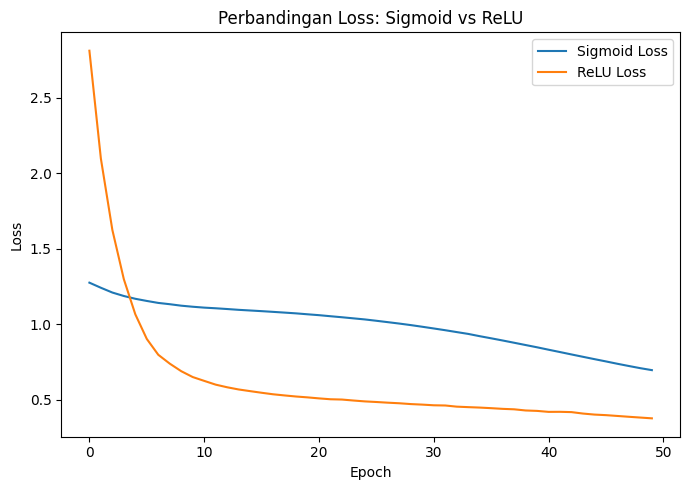

In [ ]:
# Bandingkan Sigmoid vs ReLU
# Catat perbedaan loss dan akurasi

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import tensorflow as tf
import numpy as np

# Load dataset
iris = load_iris()
X = iris.data
y = iris.target.reshape(-1, 1)

# One-hot encoding
encoder = OneHotEncoder(sparse_output=False)
y = encoder.fit_transform(y)

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Fungsi untuk melatih model dgn aktivasi tertentu
def run_model(activation):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(10, activation=activation, input_shape=(4,)),
        tf.keras.layers.Dense(8, activation=activation),
        tf.keras.layers.Dense(3, activation='softmax')
    ])

    model.compile(
        optimizer='adam',
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    history = model.fit(
        X_train, y_train,
        epochs=50, batch_size=8, verbose=0
    )

    loss, acc = model.evaluate(X_test, y_test, verbose=0)
    return history, loss, acc

# Jalankan kedua model
history_sig, loss_sig, acc_sig = run_model("sigmoid")
history_relu, loss_relu, acc_relu = run_model("relu")

# Print hasil
print("=== HASIL PERBANDINGAN ===")
print(f"Sigmoid -> Loss: {loss_sig:.4f}, Akurasi: {acc_sig:.4f}")
print(f"ReLU    -> Loss: {loss_relu:.4f}, Akurasi: {acc_relu:.4f}")

# Visualisasi loss
import matplotlib.pyplot as plt

plt.figure(figsize=(7,5))
plt.plot(history_sig.history["loss"], label="Sigmoid Loss")
plt.plot(history_relu.history["loss"], label="ReLU Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Perbandingan Loss: Sigmoid vs ReLU")
plt.legend()
plt.tight_layout()
plt.show()